In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [4]:
data=pd.read_csv('../input/tesla-data/TSLA (1).csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [5]:
data=data[['Date','Close']]
data.head()

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


In [6]:
data['Date']=pd.to_datetime(data['Date'])
data=data.set_index(['Date'])
data.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


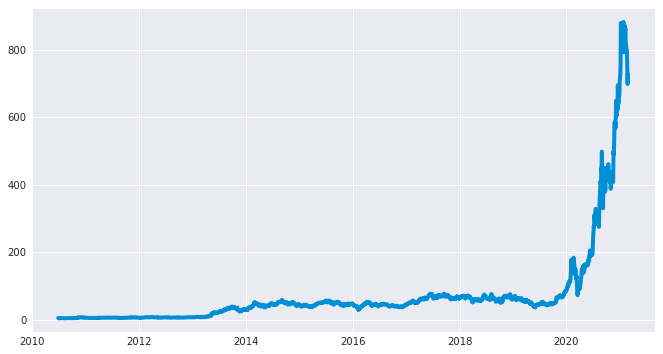

In [7]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'])

In [8]:
split_date=pd.Timestamp('2020-01-01')

In [9]:
split_date

Timestamp('2020-01-01 00:00:00')

In [10]:
data=data['Close']

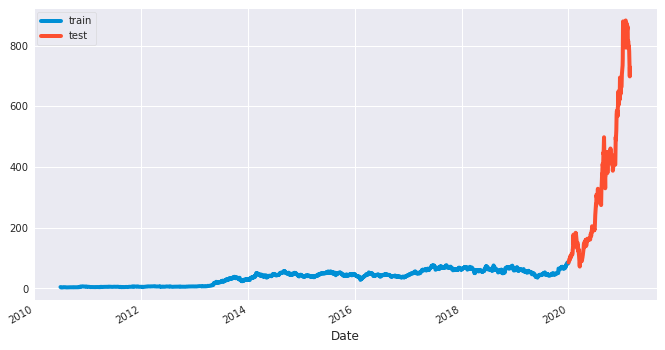

In [11]:
train=data.loc[:split_date]
test=data.loc[split_date:]
plt.figure(figsize=(10,6))
ax=train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])
plt.show()

In [12]:
scaler=MinMaxScaler(feature_range=(-1,1))
train=np.array(train).reshape(-1,1)
test=np.array(test).reshape(-1,1)
train_sc=scaler.fit_transform(train)
test_sc=scaler.fit_transform(test)

In [13]:
X_train=train_sc[:-1]
y_train=train_sc[1:]

X_test=test_sc[:-1]
y_test=test_sc[1:]

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2393, 1), (288, 1), (2393, 1), (288, 1))

In [15]:
data.shape

(2683,)

In [16]:
nn_model=Sequential()
nn_model.add(Dense(12,input_dim=1,activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error',optimizer='Adam')
early_stop=EarlyStopping(monitor='loss',patience=2,verbose=1)
history=nn_model.fit(X_train,y_train,epochs=100,batch_size=1,verbose=1,
                     callbacks=[early_stop],shuffle=False)

Epoch 1/100
2393/2393 [==============================] - 2s 827us/step - loss: 0.0081
Epoch 2/100
2393/2393 [==============================] - 2s 825us/step - loss: 0.0017
Epoch 3/100
2393/2393 [==============================] - 2s 843us/step - loss: 9.9537e-04
Epoch 4/100
2393/2393 [==============================] - 2s 877us/step - loss: 7.6616e-04
Epoch 5/100
2393/2393 [==============================] - 2s 832us/step - loss: 6.4908e-04
Epoch 6/100
2393/2393 [==============================] - 2s 822us/step - loss: 6.2196e-04
Epoch 7/100
2393/2393 [==============================] - 2s 830us/step - loss: 6.1855e-04
Epoch 8/100
2393/2393 [==============================] - 2s 819us/step - loss: 6.1140e-04
Epoch 9/100
2393/2393 [==============================] - 2s 846us/step - loss: 6.0469e-04
Epoch 10/100
2393/2393 [==============================] - 2s 826us/step - loss: 5.9834e-04
Epoch 11/100
2393/2393 [==============================] - 2s 816us/step - loss: 5.9465e-04
Epoch 12/100
239

In [17]:
y_pred_test_nn=nn_model.predict(X_test)
y_pred_train_nn=nn_model.predict(X_train)

print('The r2score on train set is {:.3f}'.format(r2_score(y_train,y_pred_train_nn)))
print('The r2score on test set is {:.3f}'.format(r2_score(y_test,y_pred_test_nn)))

The r2score on train set is 0.976
The r2score on test set is 0.975


In [18]:
X_train_lmse=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test_lmse=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [19]:
lstm_model=Sequential()
lstm_model.add(LSTM(7,input_shape=(1,X_train_lmse.shape[1]),activation='relu',
                    kernel_initializer='lecun_uniform',return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error',optimizer='Adam')
early_stop=EarlyStopping(monitor='loss',patience=2,verbose=1)
history=lstm_model.fit(X_train_lmse,y_train,epochs=100,batch_size=1,
                      verbose=1,callbacks=[early_stop],shuffle=False)

Epoch 1/100
2393/2393 [==============================] - 4s 1ms/step - loss: 0.0674
Epoch 2/100
2393/2393 [==============================] - 3s 1ms/step - loss: 0.0045
Epoch 3/100
2393/2393 [==============================] - 3s 1ms/step - loss: 0.0022
Epoch 4/100
2393/2393 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 5/100
2393/2393 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 6/100
2393/2393 [==============================] - 3s 1ms/step - loss: 9.0220e-04
Epoch 7/100
2393/2393 [==============================] - 3s 1ms/step - loss: 7.0961e-04
Epoch 8/100
2393/2393 [==============================] - 3s 1ms/step - loss: 5.8292e-04
Epoch 9/100
2393/2393 [==============================] - 3s 1ms/step - loss: 5.1707e-04
Epoch 10/100
2393/2393 [==============================] - 3s 1ms/step - loss: 4.8258e-04
Epoch 11/100
2393/2393 [==============================] - 3s 1ms/step - loss: 4.5863e-04
Epoch 12/100
2393/2393 [==========================

In [20]:
y_pred_test_lstm=lstm_model.predict(X_test_lmse)
y_pred_train_lstm=lstm_model.predict(X_train_lmse)
print('The r2score on train set is {:.3f}'.format(r2_score(y_train,y_pred_train_lstm)))
print('The r2score on test set is {:.3f}'.format(r2_score(y_test,y_pred_test_lstm)))

The r2score on train set is 0.987
The r2score on test set is 0.987


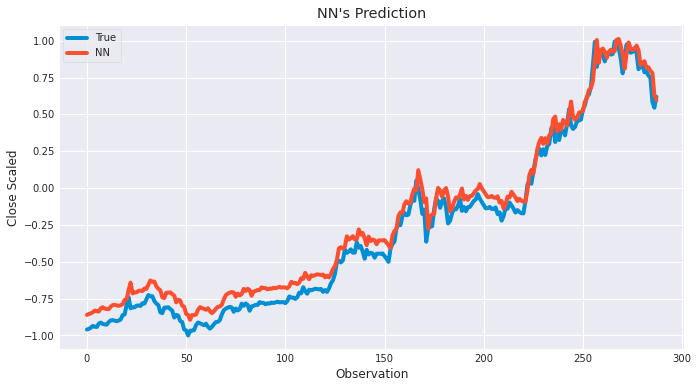

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Close Scaled')
plt.legend()
plt.show()

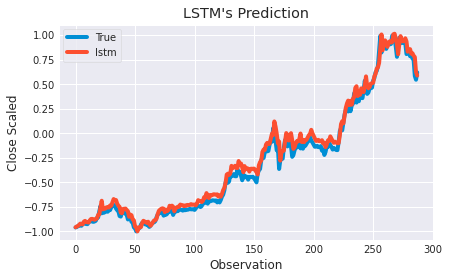

In [22]:
plt.plot(y_test,label='True')
plt.plot(y_pred_test_lstm,label='lstm')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Close Scaled')
plt.legend()
plt.show()